# Impact of the features on the sales in the regions

This seeks to answer the question: **What effect will the number of critics and users as well as their review scores have on the sales of video games in North America, Europe and Japan regions?**

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
sns.set_style('darkgrid')

In [2]:
#read data and make a copy
games = pd.read_csv('Data/cleaned_df')
games.head()

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating,release_era
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.00,322.0,Others,E,2000-2010
1,Super Mario Bros.,Others,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,74.2,28.8,6.24,1448.2,missing,missing,pre-2000s
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.30,709.0,Others,E,2000-2010
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.00,192.0,Others,E,2000-2010
4,Pokemon Red/Pokemon Blue,Others,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,90.0,9.0,8.74,817.4,missing,missing,pre-2000s


In [3]:
#is there any null values?

games.isna().sum().sort_values(ascending = False)

name               0
global_sales       0
rating             0
developer          0
user_count         0
user_score         0
critic_count       0
critic_score       0
other_sales        0
platform           0
jp_sales           0
eu_sales           0
na_sales           0
publisher          0
genre              0
year_of_release    0
release_era        0
dtype: int64

In [4]:
#to get a view of the data types

games.dtypes

name                object
platform            object
year_of_release      int64
genre               object
publisher           object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
global_sales       float64
critic_score       float64
critic_count       float64
user_score         float64
user_count         float64
developer           object
rating              object
release_era         object
dtype: object

In [5]:
games.select_dtypes(include=['object']).describe()

,name,platform,genre,publisher,developer,rating,release_era
count,16713,16713,16713,16713,16713,16713,16713
unique,11559,10,12,10,10,9,3
top,Need for Speed: Most Wanted,Others,Action,Others,Others,missing,2000-2010
freq,12,4284,3369,8923,8939,6764,10689


The name column has the most number of categories or unique categories and is an identifier, and would be irrelavent to our analysis, hence it will be removed. 

In [6]:
games.drop(['name', 'year_of_release', 'global_sales'], axis=1, inplace=True)
games.head()

#we also drop the year_of_release and global_sales columns as they are irrelevant to our objective here

,platform,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,critic_score,critic_count,user_score,user_count,developer,rating,release_era
0,Wii,Sports,Nintendo,41.36,28.96,3.77,8.45,76.0,51.0,8.00,322.0,Others,E,2000-2010
1,Others,Platform,Nintendo,29.08,3.58,6.81,0.77,74.2,28.8,6.24,1448.2,missing,missing,pre-2000s
2,Wii,Racing,Nintendo,15.68,12.76,3.79,3.29,82.0,73.0,8.30,709.0,Others,E,2000-2010
3,Wii,Sports,Nintendo,15.61,10.93,3.28,2.95,80.0,73.0,8.00,192.0,Others,E,2000-2010
4,Others,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,90.0,9.0,8.74,817.4,missing,missing,pre-2000s


In [7]:
games.select_dtypes(include=['object']).describe()

,platform,genre,publisher,developer,rating,release_era
count,16713,16713,16713,16713,16713,16713
unique,10,12,10,10,9,3
top,Others,Action,Others,Others,missing,2000-2010
freq,4284,3369,8923,8939,6764,10689


In [8]:
games.describe()

,na_sales,eu_sales,jp_sales,other_sales,critic_score,critic_count,user_score,user_count
count,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000
mean,0.263302,0.145045,0.077625,0.047343,71.198493,24.557533,7.255222,189.098075
std,0.813565,0.503359,0.308871,0.186742,11.677788,15.003701,1.147303,437.080567
min,0.000000,0.000000,0.000000,0.000000,13.000000,3.000000,0.000000,4.000000
25%,0.000000,0.000000,0.000000,0.000000,65.000000,13.200000,6.740000,17.000000
50%,0.080000,0.020000,0.000000,0.010000,70.800000,24.000000,7.340000,43.400000
75%,0.240000,0.110000,0.040000,0.030000,80.000000,31.400000,7.900000,221.800000
max,41.360000,28.960000,10.220000,10.570000,98.000000,113.000000,9.700000,10665.000000


From the table above we can observe some outliers owing to the huge difference between the 75th percentile and the maximum value. Let's look into this further with some plots. Remember our aim is to quantify the impact of critic and user reviews on video game sales in different regions.

## Checking for outliers

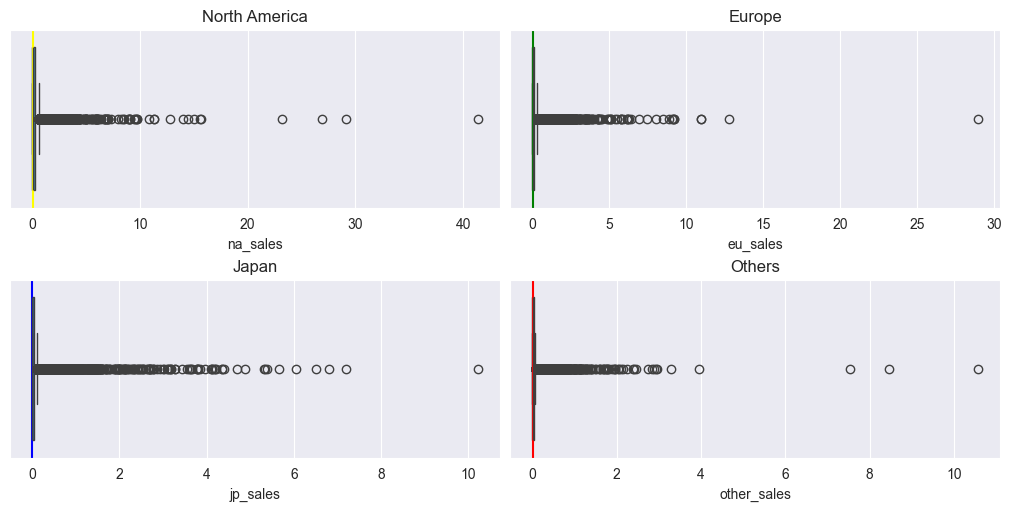

In [9]:
#using boxplots to visualize the distribution of the sales in the different regions
fig, axs = plt.subplots(2,2, figsize=(10,5), layout = 'constrained')

axs[0,0].set_title('North America')
sns.boxplot(data=games, x='na_sales', ax=axs[0,0])
axs[0,0].axvline(games['na_sales'].median(), color='yellow', label='Median')

axs[0,1].set_title('Europe')
sns.boxplot(data=games, x='eu_sales', ax=axs[0,1])
axs[0,1].axvline(games['eu_sales'].median(), color='green', label='Median')

axs[1,0].set_title('Japan')
sns.boxplot(data=games, x='jp_sales', ax=axs[1,0])
axs[1,0].axvline(games['jp_sales'].median(), color='blue', label='Median')

axs[1,1].set_title('Others')
sns.boxplot(data=games, x='other_sales', ax=axs[1,1])
axs[1,1].axvline(games['other_sales'].median(), color='red', label='Median')
plt.show()

It is observed that the sales in these regions are right skewed, showing instances where there were especially high sales in these regions. In the real sense, these sort of values are entirely possible owing to the fact that certain games can become popular amongst users and critics and drive sales.

In [10]:
games[['user_score', 'user_count', 'critic_score', 'critic_count', 'na_sales']].describe()

,user_score,user_count,critic_score,critic_count,na_sales
count,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000
mean,7.255222,189.098075,71.198493,24.557533,0.263302
std,1.147303,437.080567,11.677788,15.003701,0.813565
min,0.000000,4.000000,13.000000,3.000000,0.000000
25%,6.740000,17.000000,65.000000,13.200000,0.000000
50%,7.340000,43.400000,70.800000,24.000000,0.080000
75%,7.900000,221.800000,80.000000,31.400000,0.240000
max,9.700000,10665.000000,98.000000,113.000000,41.360000


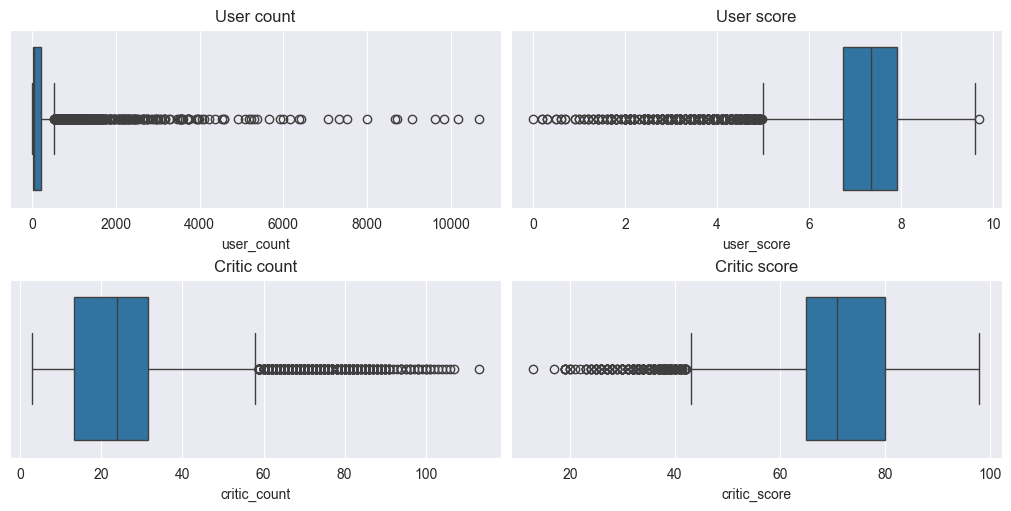

In [11]:
#to visualize the distributions for the user and critic counts and scores
fig, axs = plt.subplots(2,2, figsize=(10,5), layout = 'constrained')

axs[0,0].set_title('User count')
sns.boxplot(data=games, x='user_count', ax=axs[0,0])

axs[0,1].set_title('User score')
sns.boxplot(data=games, x='user_score',  ax=axs[0,1])

axs[1,0].set_title('Critic count')
sns.boxplot(data=games, x='critic_count', ax=axs[1,0])

axs[1,1].set_title('Critic score')
sns.boxplot(data=games, x='critic_score', ax=axs[1,1])
plt.show()

The critic and user evaluations provide insights into the reception of the games by both professional reviewers and general players.

## Importing libraries

In [12]:
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor

### Algorithm 1: Multiple linear regression

First, we examine the variables for any visible linear pattern using a scatter plot.

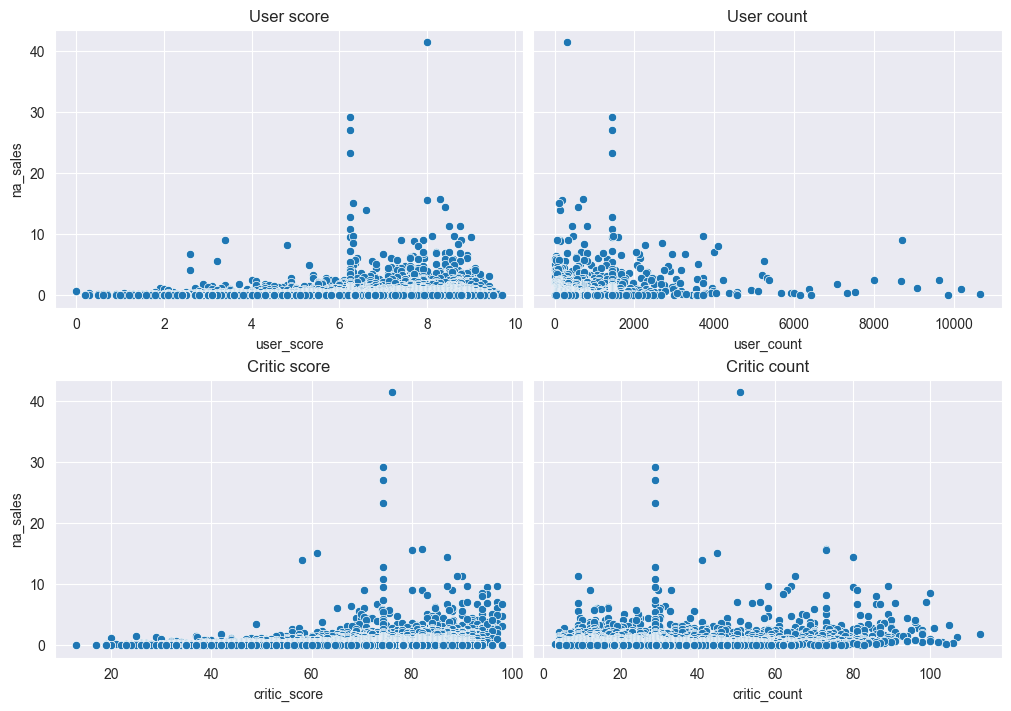

In [13]:
fig, axs = plt.subplots(2,2, figsize=(10, 7), layout='constrained', sharey=True)

axs[0,0].set_title('User score')
sns.scatterplot(data=games, x= 'user_score', y='na_sales', ax=axs[0,0])

axs[0,1].set_title('User count')
sns.scatterplot(data=games, x= 'user_count', y='na_sales', ax=axs[0,1])

axs[1,0].set_title('Critic score')
sns.scatterplot(data=games, x='critic_score', y='na_sales', ax=axs[1,0])

axs[1,1].set_title('Critic count')
sns.scatterplot(data=games, x='critic_count', y='na_sales', ax=axs[1,1])

plt.show()

There is no discernable linear relationship between the variables. Let's look at this further after applying a linear regression model

In [14]:
X = games[['user_score', 'user_count', 'critic_count', 'critic_score']]
Y = games[['na_sales']]

X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               na_sales   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     324.0
Date:                Tue, 10 Dec 2024   Prob (F-statistic):          5.33e-269
Time:                        10:48:16   Log-Likelihood:                -19642.
No. Observations:               16713   AIC:                         3.929e+04
Df Residuals:                   16708   BIC:                         3.933e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.3129      0.044     -7.081   

We have a low R2 of 0.072. This means that 7.2% of the variation in the na_sales is being explained by the model (that is the X variables) while the residuals (unexplained) takes a whopping 93%.

The condition number is quite high and indicates that there is a case of multicolinearity. This occurs when the X variables are themselves related (i.e, they are related to each other). Let's investigate.

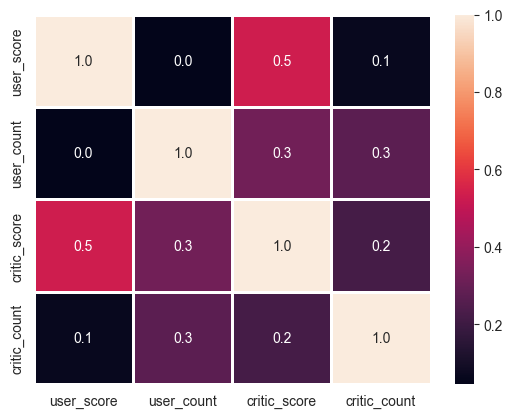

In [15]:
#investigation
num_df = games[['user_score', 'user_count', 'critic_score', 'critic_count']]
sns.heatmap(data=num_df.corr(), annot = True, fmt ='0.1f', linewidths=0.8)
plt.show()

The heatmap showed a moderate positive relationship between the user score and the critic score. It is also evident that there is zero to no relationship between the other variables as well.

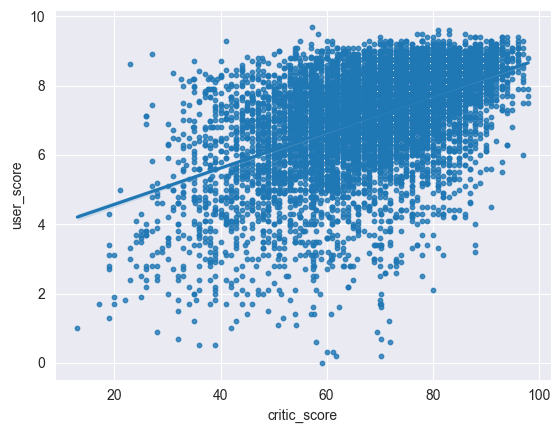

In [16]:
sns.regplot(data=games, x= 'critic_score', y='user_score', scatter_kws={'s': 10})
plt.show()

This could be the cause of our multicolinearity. The next question is how significant is this? Do we need to worry about it? We can answer this using Variance Inflation factor.

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = games[['user_score', 'user_count', 'critic_count', 'critic_score']]

X = add_constant(X)

vif_data=pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

        feature        VIF
0         const  53.113618
1    user_score   1.434103
2    user_count   1.198267
3  critic_count   1.101986
4  critic_score   1.627404


VIF values between 1 and 5 suggest moderate correlation (like the heatmap showed) but are usually acceptable. So this is not a major concern.

From the scatter plot created earlier, we see that is no visibile linear relationship between the variables. The next step is carry out some transformations to linearize the dataset.

#### Carrying out transformations to linearize the dataset

In [18]:
##applying log transformation
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

df1 = games[['na_sales', 'user_score', 'user_count', 'critic_count', 'critic_score']]
df1.loc[:,'log_user_score'] = np.log1p(df1['user_score'])
df1.loc[:,'log_user_count'] = np.log1p(df1['user_count'])
df1.loc[:,'log_critic_count'] = np.log1p(df1['critic_count'])
df1.loc[:,'log_critic_score'] = np.log1p(df1['critic_score'])
df1.loc[:,'log_na_sales'] = np.log1p(df1['na_sales'])

In [19]:
#using transformation on both the dependent and independent variable
X = df1[['log_user_score', 'log_user_count', 'log_critic_count', 'log_critic_score']]
Y = df1[['log_na_sales']]
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           log_na_sales   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     247.5
Date:                Tue, 10 Dec 2024   Prob (F-statistic):          6.67e-207
Time:                        10:48:17   Log-Likelihood:                -2030.3
No. Observations:               16713   AIC:                             4071.
Df Residuals:                   16708   BIC:                             4109.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.7912      0.054  

R2 = 0.056. This explains only 5.6% of the variation. This is no improvement from the previous model.

In [20]:
#using transformation on the dependent variable
X = df1[['user_score', 'user_count', 'critic_count', 'critic_score']]
Y = df1[['log_na_sales']]
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           log_na_sales   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     533.3
Date:                Tue, 10 Dec 2024   Prob (F-statistic):               0.00
Time:                        10:48:17   Log-Likelihood:                -1507.3
No. Observations:               16713   AIC:                             3025.
Df Residuals:                   16708   BIC:                             3063.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1318      0.015     -8.829   

R2 = 0.113. This explains only 11.3% of the variation. This is a fair improvement from the previous model, but not good enough.

In [21]:
#using transformation on the independent variables

X = df1[['log_user_score', 'log_user_count', 'log_critic_count', 'log_critic_score']]
Y = df1[['na_sales']]
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               na_sales   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     156.8
Date:                Tue, 10 Dec 2024   Prob (F-statistic):          5.77e-132
Time:                        10:48:17   Log-Likelihood:                -19958.
No. Observations:               16713   AIC:                         3.993e+04
Df Residuals:                   16708   BIC:                         3.996e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.4639      0.157  

All the models above returned a poor R2 square value. This hints at the fact that the relationship between the variables may not necessarily be linear. Next steps? Use non-linear models to capture complex relationships.

### Algorithm 2: Random Forest

In [22]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

### For NA_SALES

        Feature  Importance
1    user_count    0.429721
3  critic_count    0.240618
2  critic_score    0.190753
0    user_score    0.138908


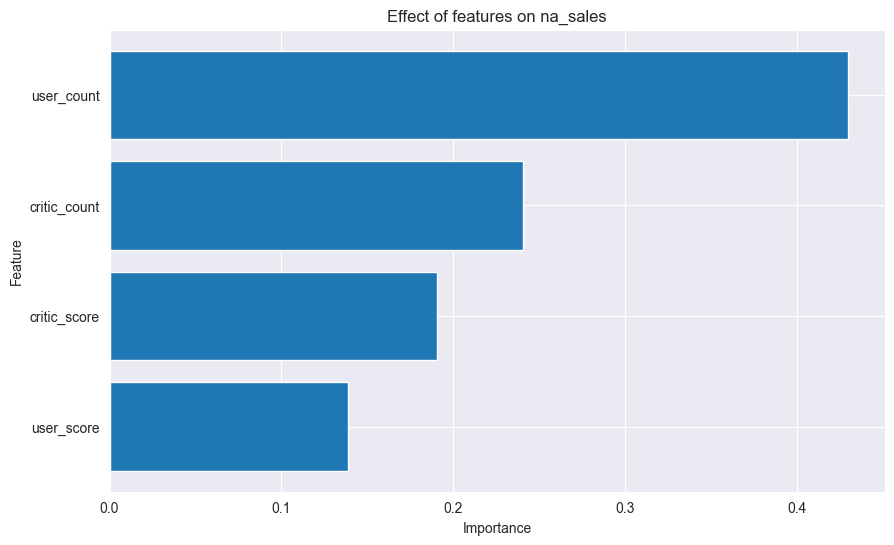

In [23]:
#using random forest

X = games[['user_score', 'user_count', 'critic_score', 'critic_count']]
Y = games[['na_sales']]

model = rf_regressor.fit(X,Y)

importances = model.feature_importances_

importance_df = pd.DataFrame({
            'Feature': X.columns,
            'Importance': importances
            }).sort_values(by='Importance', ascending = False)

print(importance_df)

##plotting feature importance
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Effect of features on na_sales')
plt.gca().invert_yaxis()
plt.show()

### For EU_SALES

        Feature  Importance
1    user_count    0.436816
3  critic_count    0.247470
2  critic_score    0.162859
0    user_score    0.152855


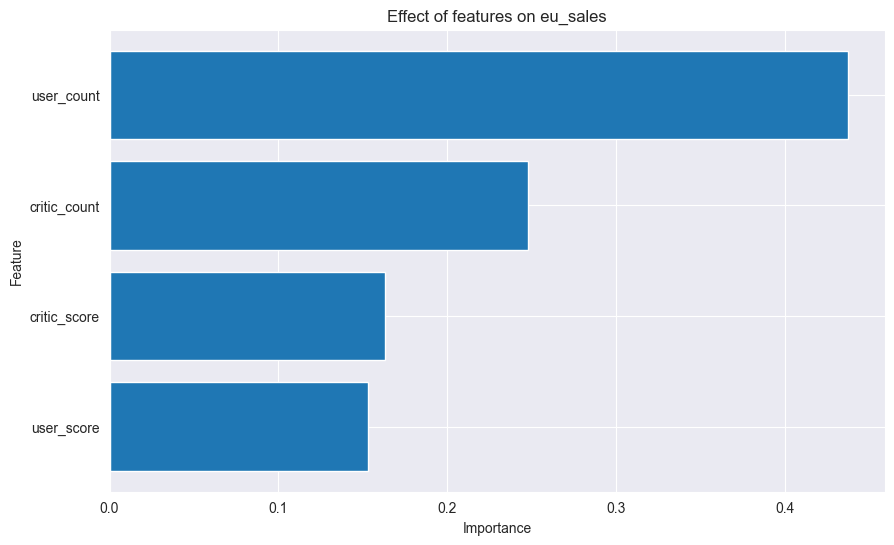

In [24]:
X = games[['user_score', 'user_count', 'critic_score', 'critic_count']]
Y = games[['eu_sales']]

#using random forest
model = rf_regressor.fit(X,Y)

importances = model.feature_importances_

importance_df = pd.DataFrame({
            'Feature': X.columns,
            'Importance': importances
            }).sort_values(by='Importance', ascending = False)

print(importance_df)
##plotting feature importance

plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Effect of features on eu_sales')
plt.gca().invert_yaxis()
plt.show()

### For JP_SALES

        Feature  Importance
1    user_count    0.404564
3  critic_count    0.229943
2  critic_score    0.185058
0    user_score    0.180436


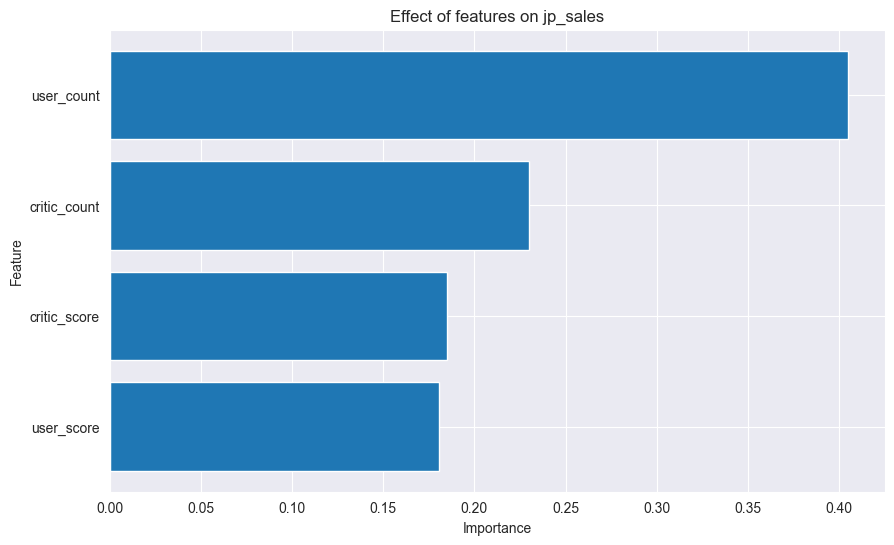

In [25]:
X = games[['user_score', 'user_count', 'critic_score', 'critic_count']]
Y = games[['jp_sales']]

#using random forest
model = rf_regressor.fit(X,Y)

importances = model.feature_importances_

importance_df = pd.DataFrame({
            'Feature': X.columns,
            'Importance': importances
            }).sort_values(by='Importance', ascending = False)

print(importance_df)

##plotting feature importance

plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Effect of features on jp_sales')
plt.gca().invert_yaxis()
plt.show()

### For OTHER SALES

        Feature  Importance
1    user_count    0.440904
3  critic_count    0.233364
2  critic_score    0.177813
0    user_score    0.147920


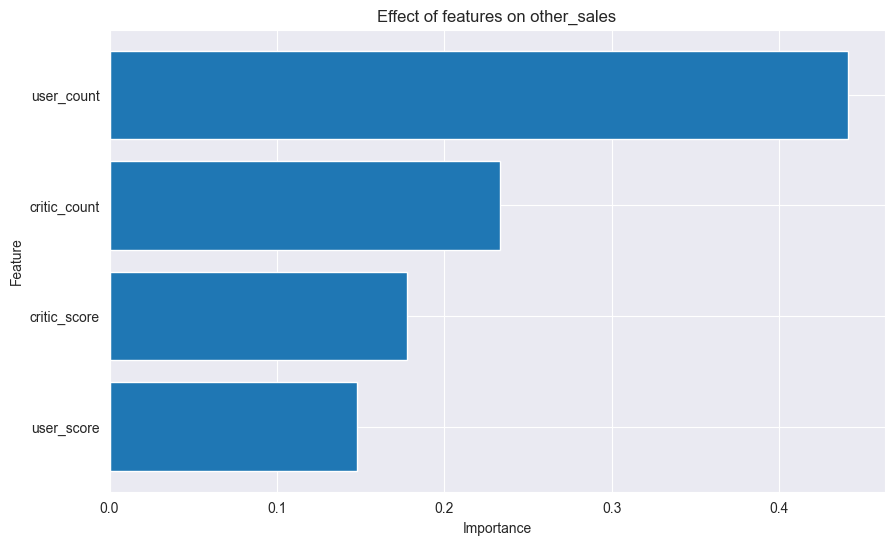

In [26]:
X = games[['user_score', 'user_count', 'critic_score', 'critic_count']]
Y = games[['other_sales']]

model = rf_regressor.fit(X,Y)

importances = model.feature_importances_

importance_df = pd.DataFrame({
            'Feature': X.columns,
            'Importance': importances
            }).sort_values(by='Importance', ascending = False)

print(importance_df)

##plotting feature importance

plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Effect of features on other_sales')
plt.gca().invert_yaxis()
plt.show()

### Background on the choosen algorithm

The random forest model returns the feature importance for each variable - user count, user score, critic count and critic score. It is a relative measure which means that a high importance score for a feature indicates its significance compared to other features, but it doesn't necessarily mean the feature has a strong **absolute** impact on the model's predictions.

### Insights
From the charts above visualizing the feature importance, we observed that the number of users is a major determinant (compared to others), in the sales of video games in each region.

In all the regions, we see that the number of users accounts for a greater percentage of the effect on the sales of video games. This indicates the popularity of games amongst individuals where the more people use the game, the higher the sales in the region can increase. 

Second to this is the number of professional critics who review the games. The least contributing factors are the user and critic scores. Though the user and critic score is an important metric to track during and after game development, it is however more important that the game becomes a favorite among the audience while keeping an eye on the user score which provides an understanding of the overall user satisfaction or impression of the game on the audience and critics.